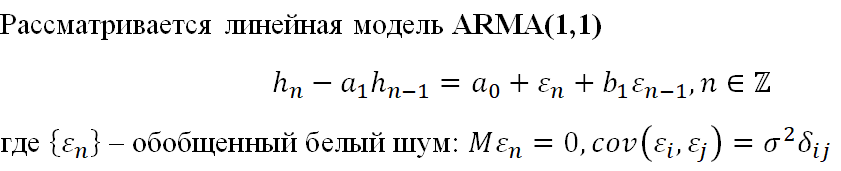

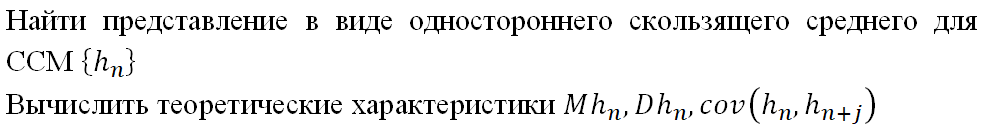

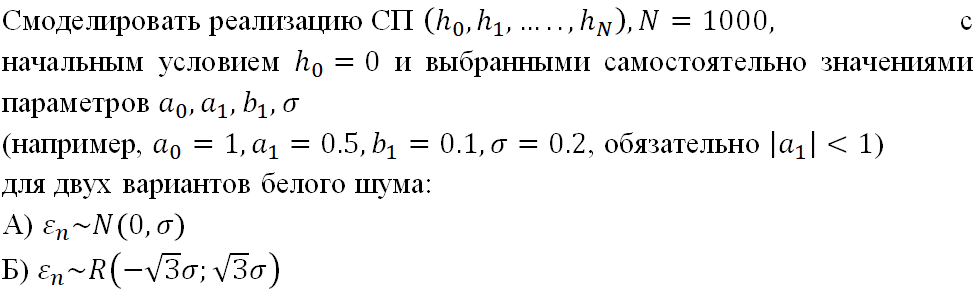

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
a0 = 2.5
a1 =  0.4
b1 = 0.8
sigma = 0.4


In [2]:
ksi_n_normal = np.random.normal(0,sigma,N)
ksi_n_uniform = np.random.uniform(-3**(1/2)*sigma, 3**(1/2)*sigma, N)
hn_normal = np.zeros(N)
hn_uniform = np.zeros(N)
for i in range(1,N):
    hn_normal[i] = a0 + a1 * hn_normal[i-1] + ksi_n_normal[i] + b1 * ksi_n_normal[i - 1]
    hn_uniform[i] = a0 + a1 * hn_uniform[i-1] + ksi_n_uniform[i] + b1 * ksi_n_uniform[i - 1]


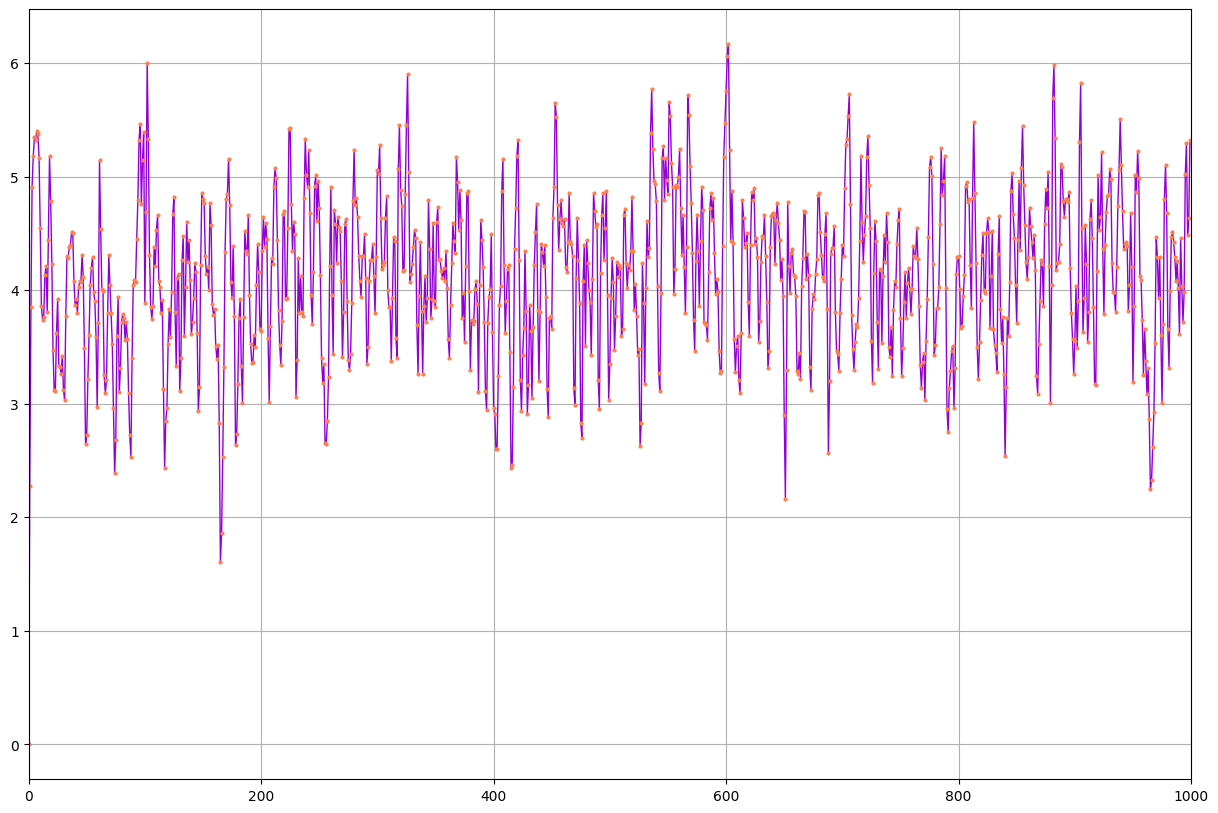

In [27]:
plt.figure(figsize=(15, 10))
plt.xlim([0, N])
plt.plot(np.arange(N), hn_normal, linestyle='-', linewidth=1, color='darkviolet')
plt.plot(np.arange(N), hn_normal, 'o', markersize = 2, color='coral')
#plt.title("Белый шум распределен по нормальному закону")
plt.grid()
plt.show()

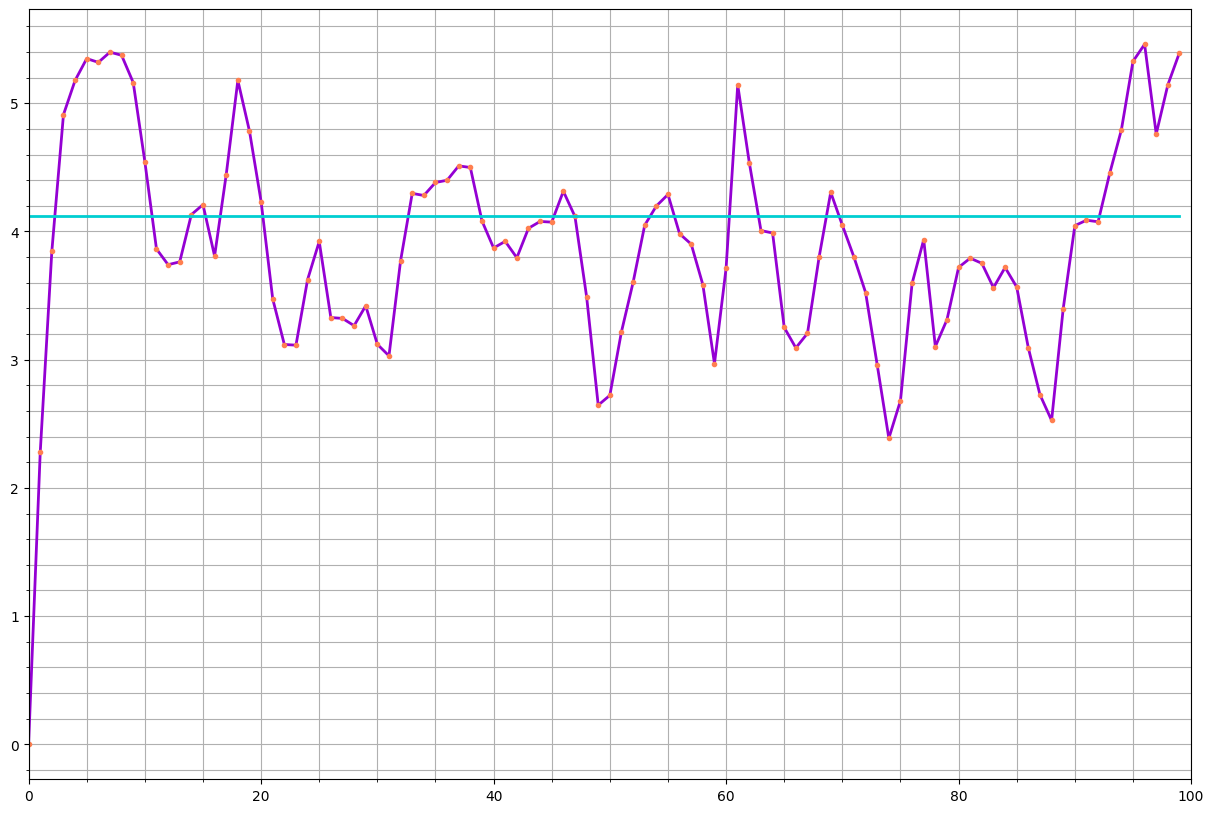

In [51]:
plt.figure(figsize=(15, 10))
plt.xlim([0, 100])
plt.plot(np.arange(100), hn_normal[:100], linestyle='-', linewidth=2, color='darkviolet')
plt.plot(np.arange(100), hn_normal[:100],'o', markersize=3, color='coral')
plt.plot(np.arange(100), [hn_normal.mean()] * 100,'-', linewidth=2, color='darkturquoise')
#plt.title("Белый шум распределен по нормальному закону")
plt.grid(which='both')
plt.minorticks_on()
plt.show()

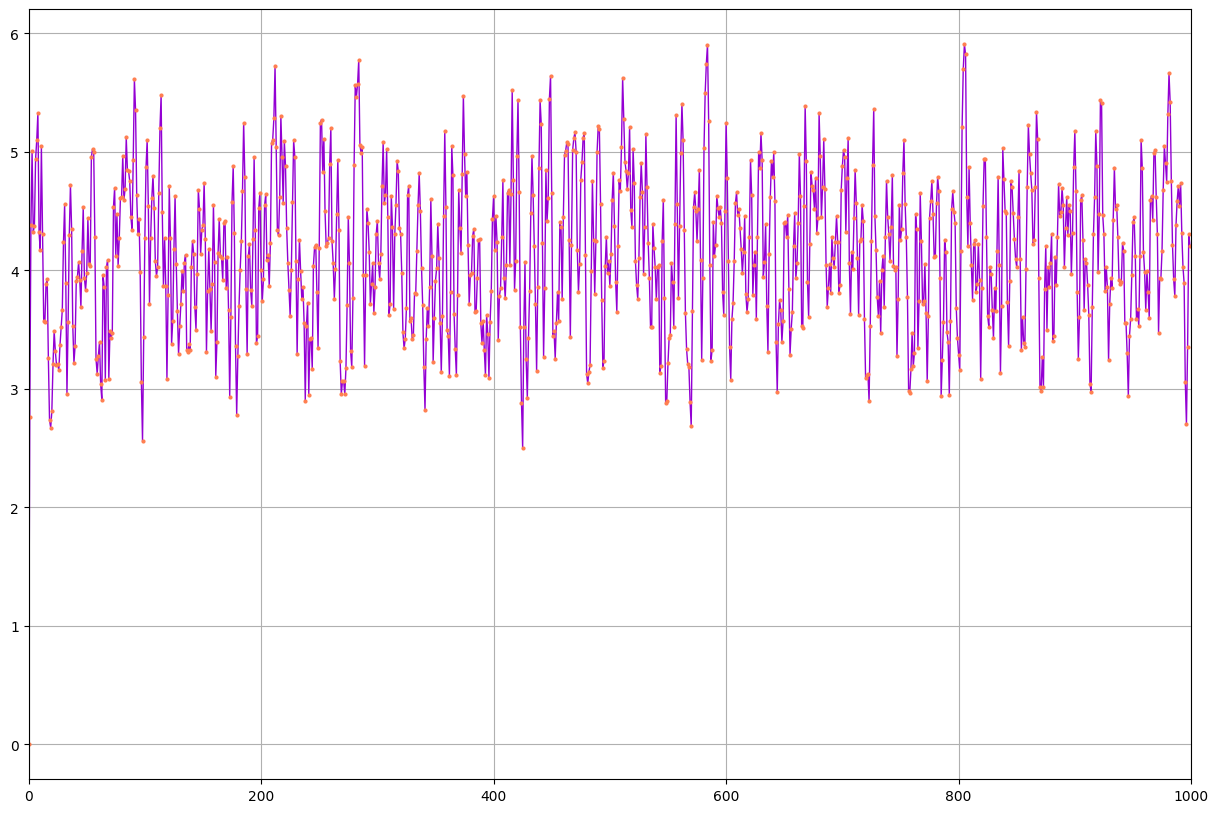

In [30]:
plt.figure(figsize=(15, 10))
plt.xlim([0, N])
plt.plot(np.arange(N), hn_uniform, linestyle='-', linewidth=1, color='darkviolet')
plt.plot(np.arange(N), hn_uniform, 'o', markersize = 2, color='coral')
#plt.title("Белый шум распределен по равномерному закону")
plt.grid()
plt.show()

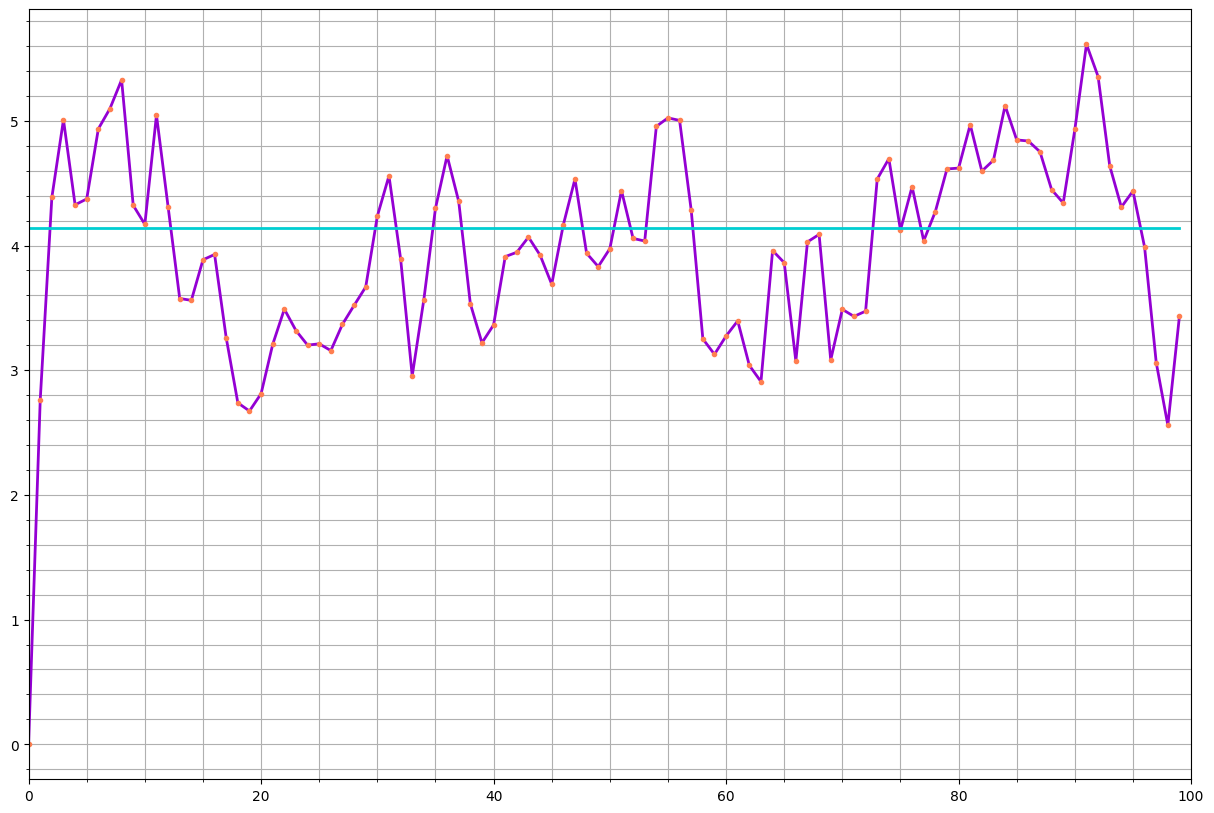

In [47]:
plt.figure(figsize=(15, 10))
plt.xlim([0, 100])
plt.plot(np.arange(100), hn_uniform[:100], linestyle='-', linewidth=2, color='darkviolet')
plt.plot(np.arange(100), hn_uniform[:100],'o', markersize=3, color='coral')
plt.plot(np.arange(100), [hn_uniform.mean()] * 100,'-', linewidth=2, color='darkturquoise')
#plt.title("Белый шум распределен по нормальному закону")
plt.grid(which='both')
plt.minorticks_on()
plt.show()

In [53]:
import pandas as pd

l = 10
emp_mean_norm = hn_normal[l:].mean()
emp_var_norm = hn_normal[l:].var()
emp_mean_uniform = hn_uniform[l:].mean()
emp_var_uniform = hn_uniform[l:].var()
teor_mean = a0/(1-a1)
teor_var = sigma ** 2 * (1 + (a1 + b1) ** 2 /(1 - a1 ** 2))
emp_cov_norm = np.zeros(3)
emp_cov_uniform = np.zeros(3)
teor_cov = np.zeros(3)

for j in [1,2,3]:
    for k in range(j + 1 + l,N):
        emp_cov_norm[j-1] += (hn_normal[k] - emp_mean_norm) * (hn_normal[k - j] - emp_mean_norm)
        emp_cov_uniform[j-1] += (hn_uniform[k] - emp_mean_uniform) * (hn_uniform[k - j] - emp_mean_uniform)
    emp_cov_norm[j-1] /= (N - l)
    emp_cov_uniform[j-1] /= (N - l)

for j in [1,2,3]:
    teor_cov[j - 1] = (sigma ** 2) * (a1 ** (j - 1)) * (a1 + b1) * (1 + a1 * b1) / (1 - a1 ** 2)

df = pd.DataFrame({
    "Теоретические значения" : [teor_mean,teor_var,*teor_cov],
    "Эмпирические значения с нормальным шумом" : [emp_mean_norm,emp_var_norm,*emp_cov_norm],
    "Эмпирические значения с равномерным шумом" : [emp_mean_uniform,emp_var_uniform,*emp_cov_uniform]},
index = ['Мат. ожидание', 'Дисперсия','K(1)', "K(2)", "K(3)"])
df

,Теоретические значения,Эмпирические значения с нормальным шумом,Эмпирические значения с равномерным шумом
Мат. ожидание,4.166667,4.120058,4.142832
Дисперсия,0.434286,0.454755,0.399253
K(1),0.301714,0.320800,0.271401
K(2),0.120686,0.137355,0.092405
K(3),0.048274,0.060833,0.019686


In [39]:
ksi_n_normal[:100]

array([ 0.11906497, -0.31885874,  0.69150736,  0.31918289,  0.4583399 ,
        0.41056973,  0.35133357,  0.49018117,  0.32250798,  0.2540674 ,
       -0.22348163, -0.275302  , -0.08446215, -0.16574966,  0.25874312,
       -0.15029477, -0.25514293,  0.62429848,  0.40127909, -0.10938876,
       -0.09219945, -0.64577886, -0.25458749, -0.43046064,  0.22374454,
       -0.20708585, -0.57454757, -0.04981145, -0.52357223,  0.0330724 ,
       -0.77461558, -0.09839934,  0.13893632,  0.17708687, -0.07987295,
        0.23361616, -0.04011814,  0.28386636, -0.03270084, -0.1910149 ,
       -0.10885241, -0.03866279, -0.24303164,  0.20119891, -0.19267429,
        0.09561493,  0.10792112, -0.19496734, -0.49870627, -0.85266283,
       -0.15412128, -0.24716052,  0.0132175 ,  0.09738968,  0.0009387 ,
        0.10836941, -0.32000762,  0.06416113, -0.5265216 , -0.54373333,
        0.46123117,  0.78875853, -0.65378631,  0.21631169, -0.28783503,
       -0.6139271 , -0.21725029, -0.35787973,  0.30392611,  0.04

In [40]:
ksi_n_uniform[:100]

array([-0.47169592,  0.63852549,  0.27023918,  0.53824001, -0.60752137,
        0.62913943,  0.18312486,  0.47800845,  0.40692491, -0.63470282,
        0.4487499 ,  0.51919183, -0.62302017, -0.15074989, -0.24900096,
        0.16069773, -0.25453275, -0.60820274, -0.57883329, -0.4595268 ,
       -0.38958982, -0.1057056 , -0.20856715, -0.41090856, -0.29723296,
       -0.3309342 , -0.36257787, -0.10433344, -0.24387391, -0.04509707,
        0.30486588,  0.12062182, -0.52468694, -0.68375195,  0.4321055 ,
        0.02570312,  0.48065955, -0.41923021, -0.37289715, -0.39508559,
       -0.10850788,  0.15248252, -0.2402794 ,  0.18113734, -0.34901321,
       -0.10040496,  0.27137394,  0.14948602, -0.49460559,  0.15139937,
       -0.17859176,  0.49415675, -0.61487576,  0.40534987,  0.51666041,
        0.12831275,  0.39118354, -0.53130259, -0.53675304, -0.24367966,
       -0.28158766, -0.18867076, -0.66887709, -0.27180735,  0.51360201,
       -0.63221006, -0.46634776,  0.67298385, -0.56107416, -0.60